In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa
from sqlalchemy import inspect
%config IPCompleter.greedy=True
pd.options.display.max_columns = None

In [33]:
con = sa.create_engine('sqlite:////Users/pablopavon/Documents/DS4B/EstructuraDirectorio/02_BUSINESS_ANALYTICS/07_CASOS/01_ANALISIS DE MERCADO INMOBILIARIO/Datos/DatosCaso1(Madrid)/airbnb.db')

In [34]:
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['listings', 'listings_det']

In [35]:
listings = pd.read_sql('listings', con)
listings_det = pd.read_sql('listings_det', con)

In [36]:
for tabla in tablas:
     exec(f'{tabla} = pd.read_sql(tabla, con)')

In [37]:
for cada in tablas:
     print(cada + ': ' + str(eval(cada).shape))

listings: (18909, 19)
listings_det: (18909, 75)


In [38]:
precio_m2 = pd.read_csv('/Users/pablopavon/Documents/DS4B/EstructuraDirectorio/02_BUSINESS_ANALYTICS/07_CASOS/01_ANALISIS DE MERCADO INMOBILIARIO/Datos/DatosCaso1(Madrid)/idealista.csv') \
    .loc[1:,['table__cell','icon-elbow']].rename(columns = {'table__cell':'precio_m2','icon-elbow':'distrito'})
precio_m2

,precio_m2,distrito
1,4.085 €/m2,Arganzuela
2,3.409 €/m2,Barajas
3,2.123 €/m2,Carabanchel
4,4.827 €/m2,Centro
5,5.098 €/m2,Chamartín
6,5.381 €/m2,Chamberí
7,2.940 €/m2,Ciudad Lineal
8,3.568 €/m2,Fuencarral
9,3.871 €/m2,Hortaleza
10,2.267 €/m2,Latina


In [39]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     object
 1   distrito   21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes


In [40]:
precio_m2.precio_m2.str.split(expand = True)[0]

1     4.085
2     3.409
3     2.123
4     4.827
5     5.098
6     5.381
7     2.940
8     3.568
9     3.871
10    2.267
11    4.033
12    2.500
13    1.918
14    4.788
15    6.114
16    2.591
17    3.678
18    1.995
19    2.403
20    2.354
21    1.693
Name: 0, dtype: object

In [41]:
precio_m2['precio_m2'] = precio_m2.precio_m2.str.split(expand = True)[0].str.replace('.','',regex=False).astype('int')
precio_m2

,precio_m2,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral
9,3871,Hortaleza
10,2267,Latina


Data quality

In [42]:
listings.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,80,2019-05-14,1.21,2,180,4,None
1,1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-05-29,0.39,2,364,0,None
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,None,NaN,5,222,0,None
3,3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,12,2020-03-01,0.51,1,115,2,None
4,4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2018-05-15,1.65,1,349,0,None


In [43]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           18909 non-null  int64  
 1   id                              18909 non-null  int64  
 2   name                            18906 non-null  object 
 3   host_id                         18909 non-null  int64  
 4   host_name                       18883 non-null  object 
 5   neighbourhood_group             18909 non-null  object 
 6   neighbourhood                   18909 non-null  object 
 7   latitude                        18909 non-null  float64
 8   longitude                       18909 non-null  float64
 9   room_type                       18909 non-null  object 
 10  price                           18909 non-null  int64  
 11  minimum_nights                  18909 non-null  int64  
 12  number_of_reviews               

In [44]:
to_delete = ['index',
              'host_name',
              'number_of_reviews',
              'last_review',
              'reviews_per_month',
              'number_of_reviews_ltm',
              'license'
             ]

listings.drop(columns = to_delete, inplace=True)

listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349
...,...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358
18905,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358
18906,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358
18907,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358


In [45]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18909 non-null  int64  
 1   name                            18906 non-null  object 
 2   host_id                         18909 non-null  int64  
 3   neighbourhood_group             18909 non-null  object 
 4   neighbourhood                   18909 non-null  object 
 5   latitude                        18909 non-null  float64
 6   longitude                       18909 non-null  float64
 7   room_type                       18909 non-null  object 
 8   price                           18909 non-null  int64  
 9   minimum_nights                  18909 non-null  int64  
 10  calculated_host_listings_count  18909 non-null  int64  
 11  availability_365                18909 non-null  int64  
dtypes: float64(2), int64(6), object(

In [48]:
for x in ['neighbourhood_group','neighbourhood','room_type']:
    listings[x] = listings[x].astype('category')

In [49]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18909 non-null  int64   
 1   name                            18906 non-null  object  
 2   host_id                         18909 non-null  int64   
 3   neighbourhood_group             18909 non-null  category
 4   neighbourhood                   18909 non-null  category
 5   latitude                        18909 non-null  float64 
 6   longitude                       18909 non-null  float64 
 7   room_type                       18909 non-null  category
 8   price                           18909 non-null  int64   
 9   minimum_nights                  18909 non-null  int64   
 10  calculated_host_listings_count  18909 non-null  int64   
 11  availability_365                18909 non-null  int64   
dtypes: category(3), fl

In [50]:
listings[listings.name.isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
1538,7164589,None,37525983,Centro,Palacio,40.41458,-3.71422,Private room,30,1,1,0
2394,11687495,None,48387429,San Blas - Canillejas,Simancas,40.43765,-3.62672,Entire home/apt,50,1,1,0
2842,13585476,None,20922102,Centro,Universidad,40.42718,-3.71144,Entire home/apt,65,3,1,0


In [51]:
listings.duplicated().sum()

0

In [52]:
listings.neighbourhood_group.value_counts()

Centro                   8433
Salamanca                1267
Chamberí                 1148
Arganzuela               1070
Tetuán                    811
Carabanchel               669
Retiro                    656
Ciudad Lineal             601
Chamartín                 562
Latina                    547
Puente de Vallecas        542
Moncloa - Aravaca         535
San Blas - Canillejas     485
Hortaleza                 374
Fuencarral - El Pardo     294
Usera                     275
Villaverde                186
Barajas                   147
Moratalaz                 131
Villa de Vallecas         105
Vicálvaro                  71
Name: neighbourhood_group, dtype: int64

In [53]:
listings.neighbourhood.value_counts()

Embajadores    2255
Universidad    1772
Palacio        1533
Sol            1126
Justicia        910
               ... 
El Plantío        5
Valdemarín        4
El Pardo          3
Horcajo           2
Atalaya           1
Name: neighbourhood, Length: 128, dtype: int64

In [54]:
listings.room_type.value_counts()

Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room           163
Name: room_type, dtype: int64

In [55]:
listings = listings.loc[listings.room_type != 'Hotel room']
listings.room_type.value_counts()

Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room             0
Name: room_type, dtype: int64

In [59]:
listings.iloc[:,8:12].describe().T

,count,mean,std,min,25%,50%,75%,max
price,18746.0,129.271365,432.384680,8.0,36.0,64.0,105.0,9999.0
minimum_nights,18746.0,7.295850,35.430022,1.0,1.0,2.0,3.0,1125.0
calculated_host_listings_count,18746.0,10.731676,26.429455,1.0,1.0,2.0,6.0,194.0
availability_365,18746.0,153.761656,140.363063,0.0,0.0,113.0,310.0,365.0


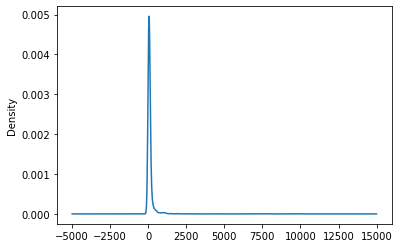

In [60]:
listings.price.plot.kde();

In [67]:
listings.price.loc[listings.price > 1000].value_counts()

1139    35
1500    19
1200    16
9999    12
2000    11
        ..
1080     1
2800     1
1799     1
1980     1
8469     1
Name: price, Length: 74, dtype: int64

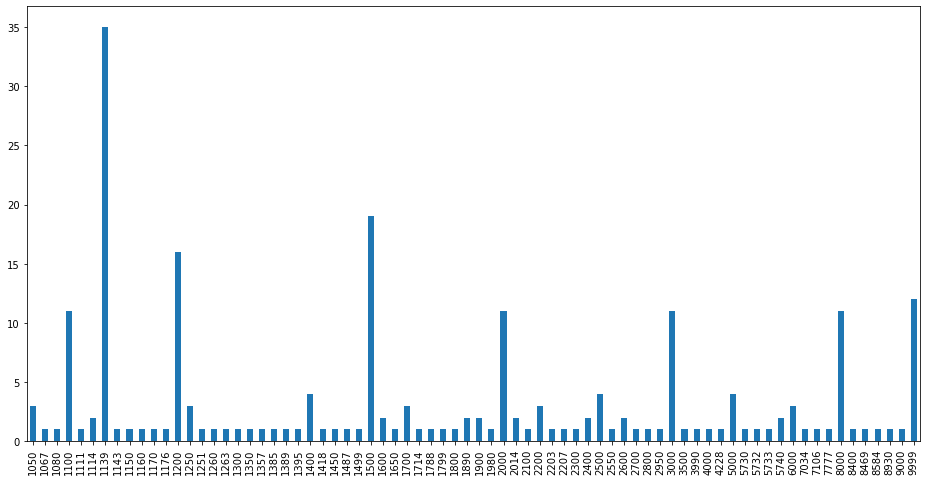

In [68]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price > 1000].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

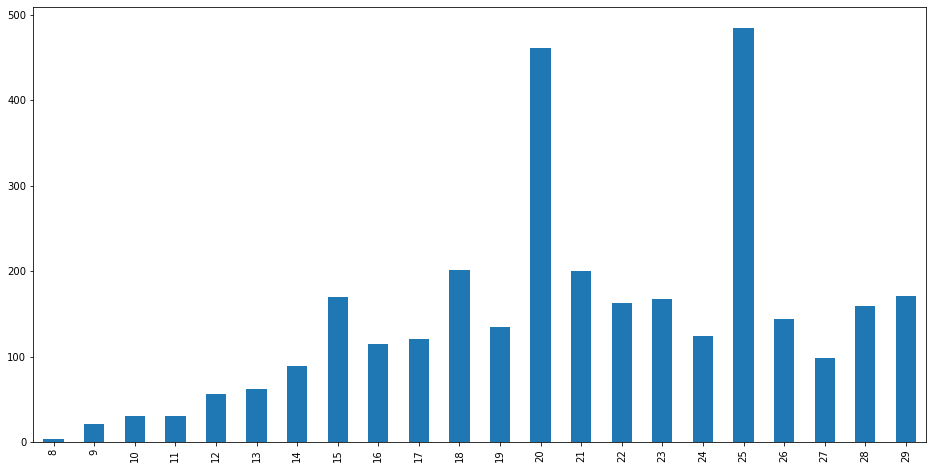

In [69]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price < 30].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

In [78]:
listings = listings.loc[listings.price > 19]
listings.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180
1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349


In [79]:
listings_det.head()

,index,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,6369,https://www.airbnb.com/rooms/6369,20210910193531,2021-09-11,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,None,https://a0.muscache.com/pictures/683224/4cc318...,13660,...,4.89,4.77,4.85,None,f,2,0,2,0,1.21
1,1,21853,https://www.airbnb.com/rooms/21853,20210910193531,2021-09-11,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,None,f,2,0,2,0,0.39
2,2,23001,https://www.airbnb.com/rooms/23001,20210910193531,2021-09-11,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,...,NaN,NaN,NaN,None,f,5,4,1,0,NaN
3,3,24805,https://www.airbnb.com/rooms/24805,20210910193531,2021-09-11,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,...,5.00,5.00,4.83,None,f,1,1,0,0,0.51
4,4,26825,https://www.airbnb.com/rooms/26825,20210910193531,2021-09-11,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,...,4.71,4.70,4.72,None,f,1,0,1,0,1.65


In [80]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         18909 non-null  int64  
 1   id                                            18909 non-null  int64  
 2   listing_url                                   18909 non-null  object 
 3   scrape_id                                     18909 non-null  int64  
 4   last_scraped                                  18909 non-null  object 
 5   name                                          18906 non-null  object 
 6   description                                   17854 non-null  object 
 7   neighborhood_overview                         10997 non-null  object 
 8   picture_url                                   18908 non-null  object 
 9   host_id                                       18909 non-null 

In [81]:
a_incluir = ['id',
              'description',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location'
             ]

listings_det = listings_det.loc[:,a_incluir]

listings_det

,id,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,Excellent connection with the AIRPORT and EXHI...,t,2,NaN,1.0,1.0,80,4.87,4.89,4.77
1,21853,We have a quiet and sunny room with a good vie...,f,1,NaN,1.0,1.0,33,4.58,4.82,4.21
2,23001,"Apartamento de tres dormitorios dobles, gran s...",f,6,NaN,3.0,5.0,0,NaN,NaN,NaN
3,24805,"Studio located 50 meters from Gran Via, next t...",f,3,NaN,NaN,1.0,12,4.92,5.00,5.00
4,26825,Nice and cozy roon for one person with a priva...,f,1,NaN,1.0,1.0,149,4.68,4.71,4.70
...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN
18905,52182273,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN
18906,52182303,ROOM <br /> <br />cozy room in madrid centro i...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN
18907,52182321,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN


In [82]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18909 non-null  int64  
 1   description                  17854 non-null  object 
 2   host_is_superhost            18883 non-null  object 
 3   accommodates                 18909 non-null  int64  
 4   bathrooms                    0 non-null      float64
 5   bedrooms                     17475 non-null  float64
 6   beds                         18568 non-null  float64
 7   number_of_reviews            18909 non-null  int64  
 8   review_scores_rating         13877 non-null  float64
 9   review_scores_communication  13640 non-null  float64
 10  review_scores_location       13637 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.6+ MB


In [83]:
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].astype('category')
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     17475 non-null  float64 
 6   beds                         18568 non-null  float64 
 7   number_of_reviews            18909 non-null  int64   
 8   review_scores_rating         13877 non-null  float64 
 9   review_scores_communication  13640 non-null  float64 
 10  review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 1.5+ MB


In [86]:
listings_det.isna().sum()

id                                 0
description                     1055
host_is_superhost                 26
accommodates                       0
bathrooms                      18909
bedrooms                        1434
beds                             341
number_of_reviews                  0
review_scores_rating            5032
review_scores_communication     5269
review_scores_location          5272
dtype: int64

In [94]:
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
0.0,222,259,41,68,15,12,5,3,0,2,0,0,0,0,0,1
1.0,2765,4911,399,639,14,9,0,3,0,2,0,0,0,0,0,9
2.0,120,1110,1016,2277,125,148,3,3,0,1,0,0,1,0,0,1
3.0,18,75,231,925,395,582,18,26,1,1,0,0,0,0,0,0
4.0,20,28,32,216,214,498,73,92,3,9,0,1,0,0,0,0
5.0,2,5,6,20,42,178,75,94,9,30,2,2,0,1,0,0
6.0,14,9,2,5,7,62,21,61,9,18,4,8,2,0,0,0
7.0,0,1,0,2,2,6,10,19,8,17,2,6,1,4,0,0
8.0,3,2,0,0,3,2,0,21,3,18,2,9,2,2,1,0


In [95]:
listings_det['beds'].value_counts(dropna = False)

1.0     8751
2.0     4805
3.0     2272
4.0     1186
0.0      628
5.0      466
NaN      341
6.0      222
7.0       78
8.0       68
10.0      39
9.0       20
14.0       6
11.0       6
12.0       5
16.0       5
13.0       4
18.0       2
17.0       2
15.0       1
23.0       1
24.0       1
Name: beds, dtype: int64

In [96]:
def imputar_nulos(registro):
    condiciones = [(registro.accommodates <= 2),
               (registro.accommodates > 2) & (registro.accommodates <= 4),
               (registro.accommodates > 4) & (registro.accommodates <= 6),
               (registro.accommodates > 6)]
    resultados = [1,2,3,4]
    return(np.select(condiciones,resultados, default = -999))

listings_det.loc[listings_det.beds.isna(),'beds'] = listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis = 1).astype('float64')

In [97]:
listings_det.beds.value_counts(dropna = False)

1.0     9061
2.0     4828
3.0     2276
4.0     1190
0.0      628
5.0      466
6.0      222
7.0       78
8.0       68
10.0      39
9.0       20
14.0       6
11.0       6
12.0       5
16.0       5
13.0       4
18.0       2
17.0       2
15.0       1
23.0       1
24.0       1
Name: beds, dtype: int64

In [98]:
pd.crosstab(listings_det.bedrooms, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bedrooms,,,,,,,,,,,,,,,,
1.0,3009,5569,1141,2265,111,81,4,14,0,7,0,0,0,0,0,11
2.0,74,173,348,1560,444,852,51,48,4,6,1,0,0,1,0,0
3.0,21,22,45,104,220,509,106,158,7,20,4,13,1,2,1,0
4.0,16,21,1,12,18,38,34,96,10,39,2,15,5,2,0,2
5.0,9,6,0,0,4,3,4,6,9,34,3,8,1,3,3,12
6.0,3,3,0,0,0,1,0,1,3,4,2,1,1,1,2,2
7.0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,6
8.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4
9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2


In [99]:
pd.crosstab(listings_det.bedrooms, listings_det.beds)

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,23.0,24.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.0,451,8038,3039,459,139,15,36,1,13,1,...,0,1,0,1,0,0,0,0,0,0
2.0,65,108,1372,1329,532,110,33,7,5,0,...,0,0,0,0,0,0,0,1,0,0
3.0,7,28,22,414,393,242,80,25,11,7,...,2,0,0,0,0,0,0,0,0,0
4.0,6,23,3,7,95,63,56,27,19,6,...,2,2,0,0,0,0,0,0,0,0
5.0,1,14,0,0,2,26,10,16,17,2,...,1,1,2,1,0,2,0,1,0,0
6.0,2,4,0,0,0,0,6,0,2,3,...,0,1,1,0,0,1,1,0,0,0
7.0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,3,1,1,1,0,0,0
8.0,0,3,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [100]:
listings_det.bedrooms.value_counts(dropna = False)

1.0     12212
2.0      3562
NaN      1434
3.0      1233
4.0       311
5.0       105
6.0        24
7.0        11
8.0         7
9.0         3
10.0        3
14.0        2
15.0        1
18.0        1
Name: bedrooms, dtype: int64

In [ ]:
def imputar_nulos(registro):
    condiciones = [(registro.accommodates <= 2),
               (registro.accommodates > 2) & (registro.accommodates <= 4),
               (registro.accommodates > 4) & (registro.accommodates <= 6),
               (registro.accommodates > 6)]
    resultados = [1,2,3,4]
    return(np.select(condiciones,resultados, default = -999))

listings_det.loc[listings_det.beds.isna(),'beds'] = listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis = 1).astype('float64')

In [101]:
def imputar_nulos(registro):
    #Lista de condiciones
    condiciones = [(registro.beds <= 2),
               (registro.beds > 2) & (registro.beds <= 4),
               (registro.beds > 4) & (registro.beds <= 6),
               (registro.beds > 6)]
    resultados = [1,2,3,4]
    return(np.select(condiciones,resultados, default = -999))

listings_det.loc[listings_det.bedrooms.isna(),'bedrooms'] = listings_det.loc[listings_det.bedrooms.isna()].apply(imputar_nulos, axis = 1).astype('float64')

In [102]:
listings_det.bedrooms.value_counts(dropna = False)

1.0     13540
2.0      3657
3.0      1244
4.0       311
5.0       105
6.0        24
7.0        11
8.0         7
9.0         3
10.0        3
14.0        2
15.0        1
18.0        1
Name: bedrooms, dtype: int64

In [103]:
listings_det.drop(columns = 'bathrooms', inplace = True)
listings_det

,id,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77
1,21853,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21
2,23001,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN
3,24805,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00
4,26825,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70
...,...,...,...,...,...,...,...,...,...,...
18904,52182264,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,1.0,0.0,0,NaN,NaN,NaN
18905,52182273,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,1.0,0.0,0,NaN,NaN,NaN
18906,52182303,ROOM <br /> <br />cozy room in madrid centro i...,f,1,1.0,0.0,0,NaN,NaN,NaN
18907,52182321,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,1.0,0.0,0,NaN,NaN,NaN


In [108]:
listings_det.host_is_superhost.value_counts()

f    15423
t     3460
Name: host_is_superhost, dtype: int64

In [105]:
listings_det.isna().sum()

id                                0
description                    1055
host_is_superhost                26
accommodates                      0
bedrooms                          0
beds                              0
number_of_reviews                 0
review_scores_rating           5032
review_scores_communication    5269
review_scores_location         5272
dtype: int64

In [106]:
listings_det.duplicated().sum()

0

In [107]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bedrooms                     18909 non-null  float64 
 5   beds                         18909 non-null  float64 
 6   number_of_reviews            18909 non-null  int64   
 7   review_scores_rating         13877 non-null  float64 
 8   review_scores_communication  13640 non-null  float64 
 9   review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 1.3+ MB


In [109]:
listings_det.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
id,18909.0,3.055841e+07,1.448889e+07,6369.0,19305558.00,33537761.00,42555334.00,52182334.0
accommodates,18909.0,3.094928e+00,1.963715e+00,0.0,2.00,2.00,4.00,16.0
bedrooms,18909.0,1.414670e+00,8.116969e-01,1.0,1.00,1.00,2.00,18.0
beds,18909.0,1.909197e+00,1.444317e+00,0.0,1.00,1.00,2.00,24.0
number_of_reviews,18909.0,3.270612e+01,6.524996e+01,0.0,0.00,5.00,32.00,744.0
review_scores_rating,13877.0,4.549404e+00,7.834379e-01,0.0,4.50,4.75,4.94,5.0
review_scores_communication,13640.0,4.776612e+00,4.632929e-01,1.0,4.75,4.92,5.00,5.0
review_scores_location,13637.0,4.788151e+00,3.774844e-01,1.0,4.73,4.92,5.00,5.0


In [117]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bedrooms                     18909 non-null  float64 
 5   beds                         18909 non-null  float64 
 6   number_of_reviews            18909 non-null  int64   
 7   review_scores_rating         13877 non-null  float64 
 8   review_scores_communication  13640 non-null  float64 
 9   review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 1.3+ MB


In [118]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17710 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              17710 non-null  int64   
 1   name                            17707 non-null  object  
 2   host_id                         17710 non-null  int64   
 3   neighbourhood_group             17710 non-null  category
 4   neighbourhood                   17710 non-null  category
 5   latitude                        17710 non-null  float64 
 6   longitude                       17710 non-null  float64 
 7   room_type                       17710 non-null  category
 8   price                           17710 non-null  int64   
 9   minimum_nights                  17710 non-null  int64   
 10  calculated_host_listings_count  17710 non-null  int64   
 11  availability_365                17710 non-null  int64   
dtypes: category(3), fl

In [119]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     int64 
 1   distrito   21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [122]:
df = pd.merge(left = listings, right = listings_det, how = 'left', on = 'id')
df.shape

(17710, 21)

In [123]:
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,...,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77
1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,...,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,...,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,...,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,...,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70


In [124]:
df.isna().sum()

id                                   0
name                                 3
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
calculated_host_listings_count       0
availability_365                     0
description                        944
host_is_superhost                   25
accommodates                         0
bedrooms                             0
beds                                 0
number_of_reviews                    0
review_scores_rating              4626
review_scores_communication       4847
review_scores_location            4850
dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17710 entries, 0 to 17709
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              17710 non-null  int64   
 1   name                            17707 non-null  object  
 2   host_id                         17710 non-null  int64   
 3   neighbourhood_group             17710 non-null  category
 4   neighbourhood                   17710 non-null  category
 5   latitude                        17710 non-null  float64 
 6   longitude                       17710 non-null  float64 
 7   room_type                       17710 non-null  category
 8   price                           17710 non-null  int64   
 9   minimum_nights                  17710 non-null  int64   
 10  calculated_host_listings_count  17710 non-null  int64   
 11  availability_365                17710 non-null  int64   
 12  description       

In [126]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     int64 
 1   distrito   21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [128]:
precio_m2.distrito.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral', 'Hortaleza', 'Latina',
       'Moncloa', 'Moratalaz', 'Puente de Vallecas', 'Retiro',
       'Salamanca', 'San Blas', 'Tetuán', 'Usera', 'Vicálvaro',
       'Villa de Vallecas', 'Villaverde'], dtype=object)

In [130]:
df.neighbourhood_group.unique().categories

Index(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'],
      dtype='object')

In [133]:
precio_m2.distrito = precio_m2.distrito.map({'Fuencarral':'Fuencarral - El Pardo',
                        'Moncloa':'Moncloa - Aravaca',
                        'San Blas':'San Blas - Canillejas'}) \
                    .fillna(precio_m2.distrito)

In [132]:
precio_m2.distrito.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'], dtype=object)

In [134]:
precio_m2

,precio_m2,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral - El Pardo
9,3871,Hortaleza
10,2267,Latina


In [136]:
df = pd.merge(left = df, right = precio_m2, how = 'left', left_on='neighbourhood_group', right_on='distrito')
df.head()


,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,...,f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,...,f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela


In [137]:
df.shape

(17710, 23)

In [138]:
df.precio_m2.isna().sum()

0

In [139]:
df.to_sql('df', con = con, if_exists = 'replace')

17710

In [141]:
con = sa.create_engine('sqlite:////Users/pablopavon/Documents/DS4B/EstructuraDirectorio/02_BUSINESS_ANALYTICS/07_CASOS/01_ANALISIS DE MERCADO INMOBILIARIO/Datos/DatosCaso1(Madrid)/airbnb.db')
df = pd.read_sql('df', con = con)
df.head()

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro
4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela


In [142]:
df.distrito.value_counts()

Centro                   8127
Salamanca                1218
Chamberí                 1089
Arganzuela               1005
Tetuán                    762
Retiro                    618
Carabanchel               581
Chamartín                 538
Ciudad Lineal             532
Moncloa - Aravaca         493
Puente de Vallecas        465
San Blas - Canillejas     463
Latina                    455
Hortaleza                 354
Fuencarral - El Pardo     265
Usera                     233
Barajas                   142
Villaverde                129
Moratalaz                  94
Villa de Vallecas          90
Vicálvaro                  57
Name: distrito, dtype: int64

In [143]:
df.loc[df.distrito == 'Centro',:].groupby('room_type').price.mean()

room_type
Entire home/apt    148.859980
Private room        67.131643
Shared room         60.464286
Name: price, dtype: float64

In [144]:
def crear_precio_total(registro):
    if (registro.beds > 1) & ((registro.room_type == 'Private room') | (registro.room_type == 'Shared room')):
        salida = registro.price * registro.beds * 0.7
    else:
        salida = registro.price
    return(salida)

df['precio_total'] = df.apply(crear_precio_total, axis = 1)

In [145]:
df[['room_type','price','beds','precio_total']].head(30)

,room_type,price,beds,precio_total
0,Private room,60,1.0,60.0
1,Private room,31,1.0,31.0
2,Entire home/apt,50,5.0,50.0
3,Entire home/apt,92,1.0,92.0
4,Private room,26,1.0,26.0
5,Entire home/apt,85,3.0,85.0
6,Entire home/apt,65,2.0,65.0
7,Entire home/apt,54,1.0,54.0
8,Entire home/apt,1400,3.0,1400.0
9,Entire home/apt,81,2.0,81.0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17710 entries, 0 to 17709
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           17710 non-null  int64  
 1   id                              17710 non-null  int64  
 2   name                            17707 non-null  object 
 3   host_id                         17710 non-null  int64  
 4   neighbourhood_group             17710 non-null  object 
 5   neighbourhood                   17710 non-null  object 
 6   latitude                        17710 non-null  float64
 7   longitude                       17710 non-null  float64
 8   room_type                       17710 non-null  object 
 9   price                           17710 non-null  int64  
 10  minimum_nights                  17710 non-null  int64  
 11  calculated_host_listings_count  17710 non-null  int64  
 12  availability_365                

In [149]:
df.availability_365.head()

0    180
1    364
2    222
3    115
4    349
Name: availability_365, dtype: int64

In [161]:
df['ocupacion %'] = ((365 - df.availability_365) / 365 * 100).astype('int')
df[['availability_365','ocupacion %']].head()

,availability_365,ocupacion %
0,180,50
1,364,0
2,222,39
3,115,68
4,349,4


In [162]:
df.bedrooms.value_counts()

1.0     12422
2.0      3617
3.0      1228
4.0       296
5.0        96
6.0        23
7.0        11
8.0         7
9.0         3
10.0        3
14.0        2
15.0        1
18.0        1
Name: bedrooms, dtype: int64

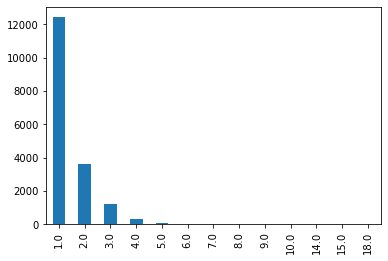

In [160]:
df.bedrooms.value_counts().plot.bar();

In [248]:
condiciones = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms > 3]
resultados = ['01_One','02_Two','03_Three','04_Four_or_more']

df['Beedrooms_disc'] = np.select(condiciones, resultados, default = -999)

In [226]:
df['Beedrooms_disc'].value_counts()

01_One             12422
02_Two              3617
03_Three            1228
04_Four_or_more      443
Name: Beedrooms_disc, dtype: int64

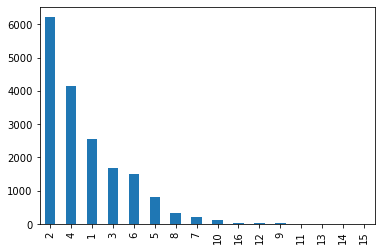

In [227]:
df.accommodates.value_counts().plot.bar();

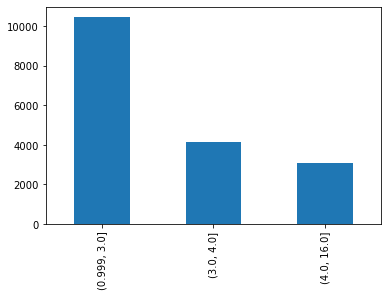

In [228]:
pd.qcut(df.accommodates, [0,0.5,0.8,1]).value_counts().plot.bar();

In [229]:
df['accomodates_disc'] = pd.qcut(df.accommodates, [0,0.5,0.8,1],
        labels = ['0-3','4','5-16'])

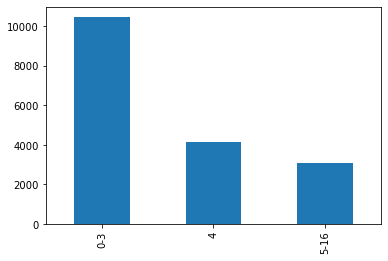

In [230]:
df['accomodates_disc'].value_counts().plot.bar();

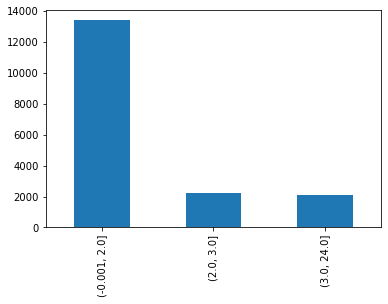

In [231]:
pd.qcut(df.beds, [0,0.5,0.8,1]).value_counts().plot.bar();

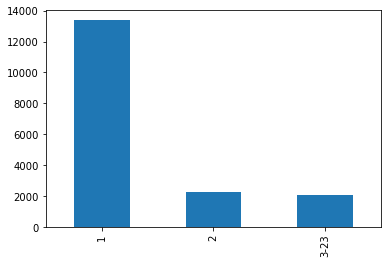

In [232]:
df['beds_disc'] = pd.qcut(df.beds, [0,0.5,0.8,1],
        labels = ['1','2','3-23'])
df['beds_disc'].value_counts().plot.bar();

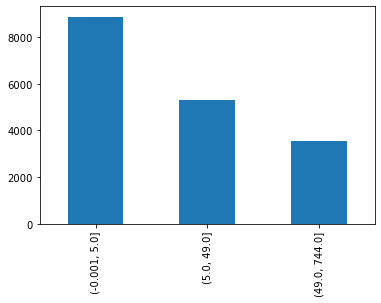

In [233]:
pd.qcut(df.number_of_reviews, [0,0.5,0.8,1]).value_counts().plot.bar();

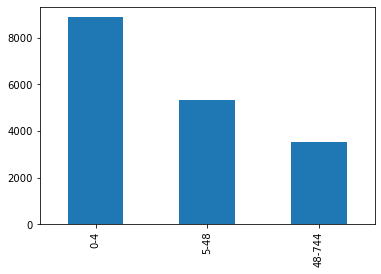

In [234]:
df['number_of_reviews_disc'] = pd.qcut(df.number_of_reviews, [0,0.5,0.8,1],
        labels = ['0-4','5-48','48-744'])
df['number_of_reviews_disc'].value_counts().plot.bar();

In [235]:
condiciones = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms == 4,
               df.bedrooms > 4]

resultados = [50,70,90,120,150]

df['m2'] = np.select(condiciones, resultados, default = -999)

In [236]:
df['m2'].value_counts()

50     12422
70      3617
90      1228
120      296
150      147
Name: m2, dtype: int64

In [237]:
df['precio_compra'] = df.m2 * df.precio_m2 * 0.7
df[['bedrooms','m2','distrito','precio_m2','precio_compra']].head(20)

,bedrooms,m2,distrito,precio_m2,precio_compra
0,1.0,50,Chamartín,5098,178430.0
1,1.0,50,Latina,2267,79345.0
2,3.0,90,Arganzuela,4085,257355.0
3,1.0,50,Centro,4827,168945.0
4,1.0,50,Arganzuela,4085,142975.0
5,3.0,90,Arganzuela,4085,257355.0
6,1.0,50,Centro,4827,168945.0
7,1.0,50,Centro,4827,168945.0
8,2.0,70,Centro,4827,236523.0
9,1.0,50,Centro,4827,168945.0


In [238]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [239]:
lat1 = 40.4167278
lon1 = -3.7033387
#Latitutde and longitude from "Puerta del sol"

df['pdi_sol'] = df.apply(lambda registro: haversine(lat1,lon1,registro.latitude,registro.longitude),axis = 1)

In [240]:
df.groupby('distrito').pdi_sol.mean().sort_values()

distrito
Centro                    0.730611
Arganzuela                1.939114
Chamberí                  2.133167
Retiro                    2.450593
Salamanca                 2.715975
Moncloa - Aravaca         3.294526
Usera                     3.928874
Latina                    3.942634
Carabanchel               3.970238
Chamartín                 4.432842
Puente de Vallecas        4.481127
Tetuán                    4.624605
Moratalaz                 5.073901
Ciudad Lineal             5.231293
Villaverde                7.664192
Fuencarral - El Pardo     8.062301
Hortaleza                 8.074184
San Blas - Canillejas     8.199011
Vicálvaro                 8.599559
Villa de Vallecas         9.176618
Barajas                  11.439064
Name: pdi_sol, dtype: float64

In [241]:
df.to_sql('df_preparado', con = con, if_exists = 'replace')

ValueError: duplicate name in index/columns: cannot insert level_0, already exists

In [ ]:
con = sa.create_engine('sqlite:////Users/pablopavon/Documents/DS4B/EstructuraDirectorio/02_BUSINESS_ANALYTICS/07_CASOS/01_ANALISIS DE MERCADO INMOBILIARIO/Datos/DatosCaso1(Madrid)/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

In [ ]:
df.info()

In [199]:
df.precio_total.describe()

count    17710.000000
mean       149.027770
std        523.211567
min         20.000000
25%         43.000000
50%         70.000000
75%        112.000000
max      22400.000000
Name: precio_total, dtype: float64

In [201]:
df.precio_total.median()

70.0

In [204]:
df.groupby('distrito').precio_total.median().sort_values(ascending = False)

distrito
San Blas - Canillejas    90.0
Salamanca                88.0
Centro                   76.0
Chamartín                74.0
Chamberí                 70.0
Hortaleza                69.0
Retiro                   68.0
Tetuán                   66.0
Moncloa - Aravaca        61.0
Fuencarral - El Pardo    60.0
Arganzuela               58.0
Vicálvaro                53.0
Ciudad Lineal            50.0
Barajas                  49.5
Carabanchel              48.0
Villa de Vallecas        47.5
Latina                   47.0
Usera                    42.0
Villaverde               42.0
Moratalaz                40.0
Puente de Vallecas       40.0
Name: precio_total, dtype: float64

In [249]:
df.loc[df.distrito == 'San Blas - Canillejas'].sort_values('precio_total', ascending = False).head(5)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,ocupacion %,Beedrooms_disc,accomodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol,Bedrooms_disc
9290,9290,9290,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,2800,1,2,0,3 rooms 15´walking from Wanda.,f,6,3.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,9800.0,100,100,03_Three,5-16,3-23,0-4,90,163233.0,7.532233,03_Three
9662,9662,9662,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,3000,1,1,88,Cerca nos podemos encontrar un centro comercia...,f,4,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6300.0,75,75,02_Two,4,2,0-4,70,126959.0,7.439364,02_Two
10189,10189,10189,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,6000,1,1,365,We are talking about one of the last villas fo...,f,6,4.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6000.0,0,0,04_Four_or_more,5-16,3-23,0-4,120,217644.0,8.212429,04_Four_or_more
9668,9668,9668,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,2700,1,1,0,Somos una pareja joven educados y muy sociable...,f,5,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,5670.0,100,100,02_Two,5-16,2,0-4,70,126959.0,8.391922,02_Two
9878,9878,9878,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,800,1,1,88,"Se alquilan 5 habitaciones, cada una para 2 hu...",f,10,5.0,8.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4480.0,75,75,04_Four_or_more,5-16,3-23,0-4,150,272055.0,7.714952,04_Four_or_more


In [250]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
distrito,,
Arganzuela,58.0,142975.0
Barajas,49.5,119315.0
Carabanchel,48.0,74305.0
Centro,76.0,168945.0
Chamartín,74.0,178430.0
Chamberí,70.0,188335.0
Ciudad Lineal,50.0,102900.0
Fuencarral - El Pardo,60.0,124880.0
Hortaleza,69.0,135485.0


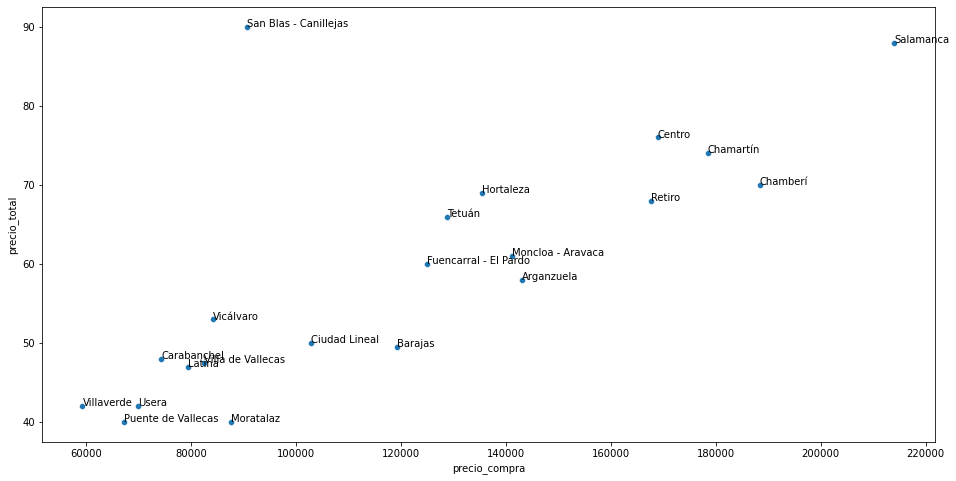

In [208]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

In [209]:
temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood,,
Abrantes,35.5,74305.0
Acacias,53.8,142975.0
Adelfas,54.0,234612.0
Aeropuerto,41.3,119315.0
Aguilas,47.0,79345.0
...,...,...
Valverde,62.5,124880.0
Ventas,42.0,102900.0
Vinateros,50.0,87500.0


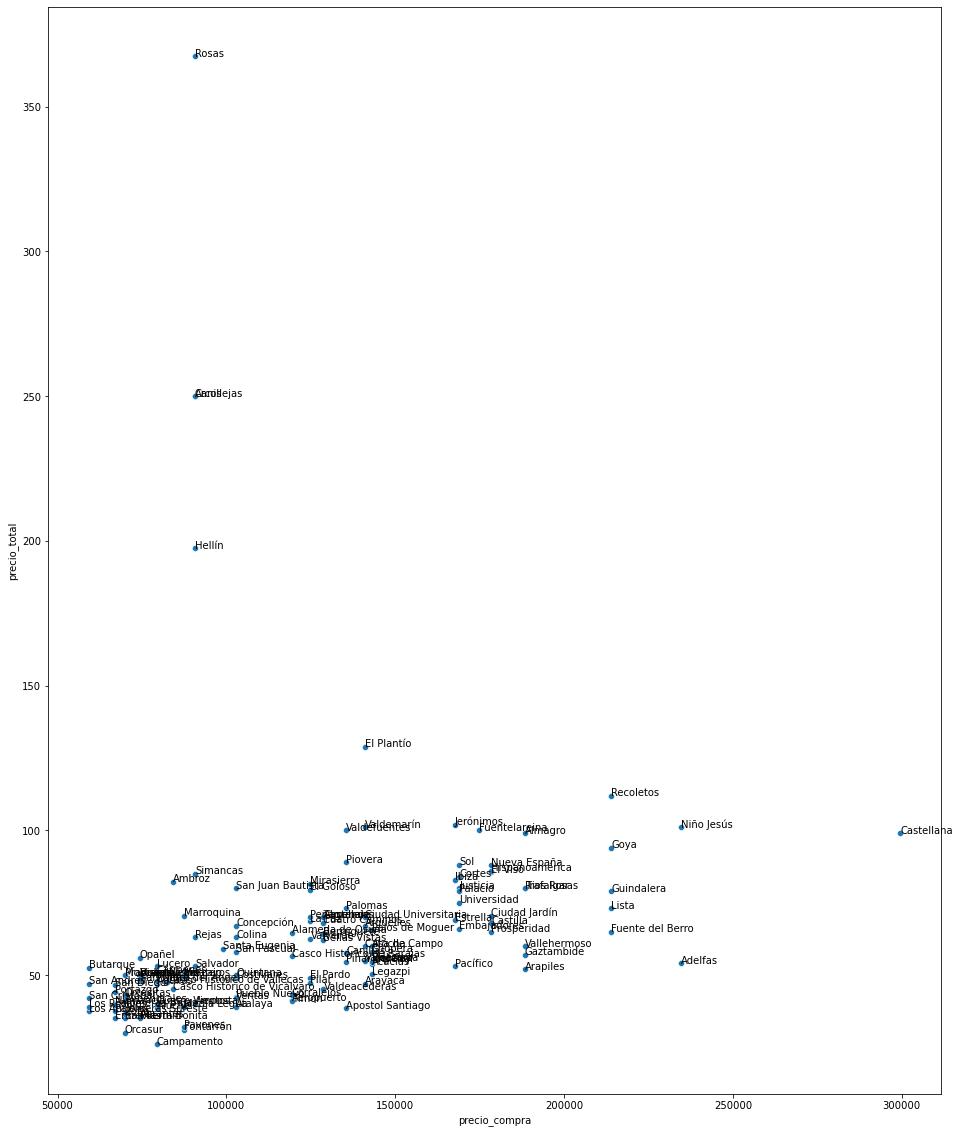

In [213]:
plt.figure(figsize = (16,20))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

In [244]:
df.filter(like = 'disc')

,Beedrooms_disc,accomodates_disc,beds_disc,number_of_reviews_disc,Bedrooms_disc
0,01_One,0-3,1,48-744,01_One
1,01_One,0-3,1,5-48,01_One
2,03_Three,5-16,3-23,0-4,03_Three
3,01_One,0-3,1,5-48,01_One
4,01_One,0-3,1,48-744,01_One
...,...,...,...,...,...
17705,01_One,0-3,1,0-4,01_One
17706,01_One,0-3,1,0-4,01_One
17707,01_One,0-3,1,0-4,01_One
17708,01_One,0-3,1,0-4,01_One


In [215]:
df.loc[df.neighbourhood.isin(['Rosas','Canillejas','Hellin']),'distrito'].unique()

array(['San Blas - Canillejas'], dtype=object)

In [219]:
metricas = ['precio_total','precio_compra']
dimensiones = ['Beedrooms_disc','accomodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,Beedrooms_disc,accomodates_disc,beds_disc,number_of_reviews_disc,precio_total,precio_compra
0,01_One,0-3,1,48-744,60.0,178430.0
1,01_One,0-3,1,5-48,31.0,79345.0
2,03_Three,5-16,3-23,0-4,50.0,257355.0
3,01_One,0-3,1,5-48,92.0,168945.0
4,01_One,0-3,1,48-744,26.0,142975.0
...,...,...,...,...,...,...
17705,01_One,0-3,1,0-4,29.0,168945.0
17706,01_One,0-3,1,0-4,29.0,168945.0
17707,01_One,0-3,1,0-4,29.0,168945.0
17708,01_One,0-3,1,0-4,29.0,213990.0


In [220]:
minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])
minicubo_precio

,precio_total,precio_compra,variable,value
0,60.0,178430.0,Beedrooms_disc,01_One
1,31.0,79345.0,Beedrooms_disc,01_One
2,50.0,257355.0,Beedrooms_disc,03_Three
3,92.0,168945.0,Beedrooms_disc,01_One
4,26.0,142975.0,Beedrooms_disc,01_One
...,...,...,...,...
70835,29.0,168945.0,number_of_reviews_disc,0-4
70836,29.0,168945.0,number_of_reviews_disc,0-4
70837,29.0,168945.0,number_of_reviews_disc,0-4
70838,29.0,213990.0,number_of_reviews_disc,0-4


In [221]:
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio

precio_total  precio_compra
variable               value                                       
Beedrooms_disc         01_One                   56.0       168945.0
                       02_Two                  100.0       236523.0
                       03_Three                140.0       304101.0
                       04_Four_or_more         204.0       405468.0
accomodates_disc       0-3                      50.0       168945.0
                       4                        86.0       168945.0
                       5-16                    126.0       236523.0
beds_disc              1                        59.0       168945.0
                       2                       100.0       236523.0
                       3-23                    139.0       257355.0
number_of_reviews_disc 0-4                      70.0       168945.0
                       48-744                   68.0       168945.0
                       5-48                     69.0       168945.0

In [252]:
minicubo_precio.loc['Beedrooms_disc']

,precio_total,precio_compra
value,,
01_One,56.0,168945.0
02_Two,100.0,236523.0
03_Three,140.0,304101.0
04_Four_or_more,204.0,405468.0


In [255]:
minicubo_precio.loc['beds_disc']

,precio_total,precio_compra
value,,
1,59.0,168945.0
2,100.0,236523.0
3-23,139.0,257355.0


In [258]:
df.groupby('distrito').pdi_sol.median().sort_values()

distrito
Centro                    0.728581
Arganzuela                1.817840
Chamberí                  2.078790
Moncloa - Aravaca         2.130135
Retiro                    2.415432
Salamanca                 2.705209
Latina                    3.496952
Carabanchel               3.647956
Usera                     3.661376
Chamartín                 4.233216
Puente de Vallecas        4.233631
Tetuán                    4.572866
Ciudad Lineal             5.170226
Moratalaz                 5.242395
Villaverde                7.579665
Fuencarral - El Pardo     7.738933
San Blas - Canillejas     7.962141
Hortaleza                 8.132864
Vicálvaro                 8.396723
Villa de Vallecas         8.822907
Barajas                  11.593340
Name: pdi_sol, dtype: float64

In [266]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()
seleccion

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

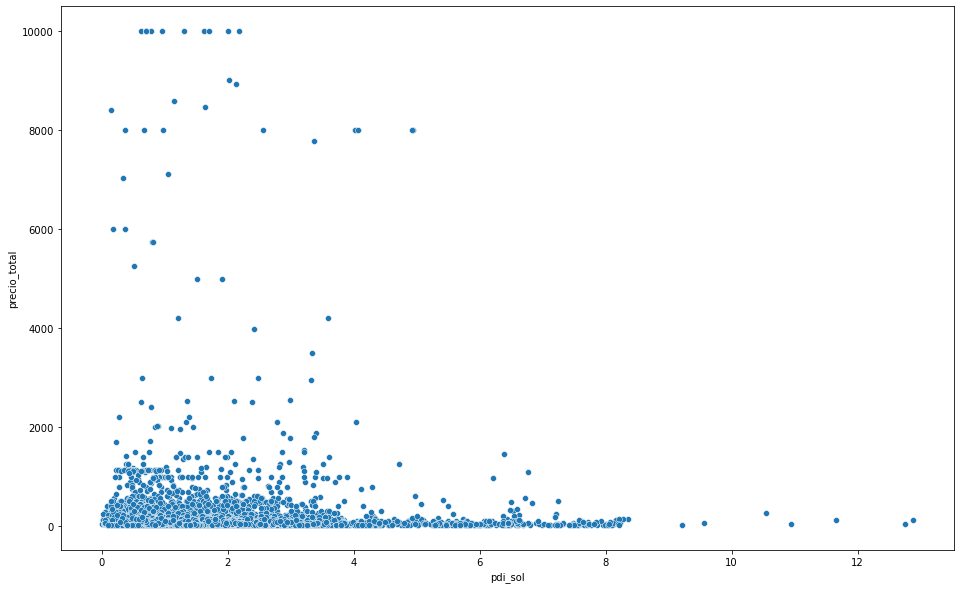

In [269]:
f, ax = plt.subplots(figsize = (16,10))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)],x = 'pdi_sol', y = 'precio_total');

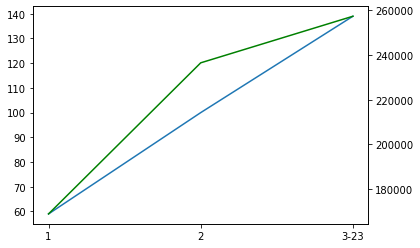

In [256]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green');

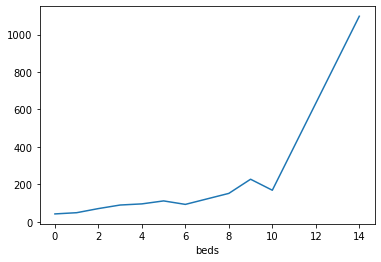

In [273]:
df[df.bedrooms == 1].groupby('beds').precio_total.median().plot();

In [274]:
df.loc[(df.bedrooms == 1)& (df.beds > 8)]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,ocupacion %,Beedrooms_disc,accomodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol,Bedrooms_disc
357,357,357,1044902,Masía el Ferrajón,5751753,Moncloa - Aravaca,Ciudad Universitaria,40.46549,-3.75115,Private room,112,2,1,0,<b>The space</b><br />Masía el Ferrajón featur...,f,16,1.0,14.0,0,NaN,NaN,NaN,4033,Moncloa - Aravaca,1097.6,100,100,01_One,5-16,3-23,0-4,50,141155.0,6.767308,01_One
605,605,605,2143824,The Hat Madrid - 10 people shared,10940437,Centro,Sol,40.41511,-3.70804,Shared room,24,1,6,364,10 people shared room with shared bathroom. <b...,t,10,1.0,10.0,91,4.57,4.69,4.84,4827,Centro,168.0,0,0,01_One,5-16,3-23,48-744,50,168945.0,0.436897,01_One
710,710,710,3011110,The Hat Madrid-Compartida 10 pers 2,10940437,Centro,Embajadores,40.41311,-3.70621,Shared room,24,1,6,364,The Hat Madrid es el primer Boutique Hostel de...,t,10,1.0,10.0,28,4.56,4.81,4.93,4827,Centro,168.0,0,0,01_One,5-16,3-23,5-48,50,168945.0,0.470155,01_One
11848,11848,11848,39600798,Bed in a 10-Bed Dormitory In the Centre of Madrid,304035848,Centro,Justicia,40.42710,-3.69912,Shared room,20,1,13,351,"Low-key, hostel-style setup on a tree-lined st...",f,1,1.0,10.0,2,5.00,5.00,5.00,4827,Centro,140.0,3,3,01_One,0-3,3-23,0-4,50,168945.0,1.207701,01_One
13340,13340,13340,42492960,Apartamento dúplex 10camas en literas,338384437,Tetuán,Cuatro Caminos,40.44959,-3.70138,Private room,298,1,1,364,Vivienda en planta baja con 10 plazas distribu...,f,10,1.0,10.0,1,5.00,4.00,5.00,3678,Tetuán,2086.0,0,0,01_One,5-16,3-23,0-4,50,128730.0,3.658902,01_One
15722,15722,15722,48855617,"habitaciones en una casa tranquila, en el centro",194738186,Salamanca,Fuente del Berro,40.42604,-3.66373,Private room,36,2,1,359,Es una casa que tiene dos habitaciones que se ...,f,5,1.0,9.0,0,NaN,NaN,NaN,6114,Salamanca,226.8,1,1,01_One,5-16,3-23,0-4,50,213990.0,3.510206,01_One


In [277]:
minicubo_precio.loc['accomodates_disc']

,precio_total,precio_compra
value,,
0-3,50.0,168945.0
4,86.0,168945.0
5-16,126.0,236523.0


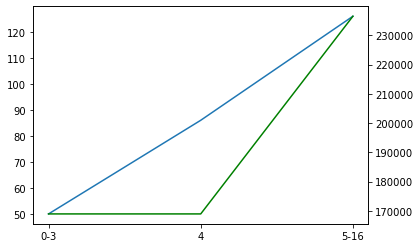

In [278]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accomodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accomodates_disc'].precio_compra,color = 'green');

In [279]:
df.groupby('distrito').pdi_sol.median().sort_values()

distrito
Centro                    0.728581
Arganzuela                1.817840
Chamberí                  2.078790
Moncloa - Aravaca         2.130135
Retiro                    2.415432
Salamanca                 2.705209
Latina                    3.496952
Carabanchel               3.647956
Usera                     3.661376
Chamartín                 4.233216
Puente de Vallecas        4.233631
Tetuán                    4.572866
Ciudad Lineal             5.170226
Moratalaz                 5.242395
Villaverde                7.579665
Fuencarral - El Pardo     7.738933
San Blas - Canillejas     7.962141
Hortaleza                 8.132864
Vicálvaro                 8.396723
Villa de Vallecas         8.822907
Barajas                  11.593340
Name: pdi_sol, dtype: float64

In [280]:
df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

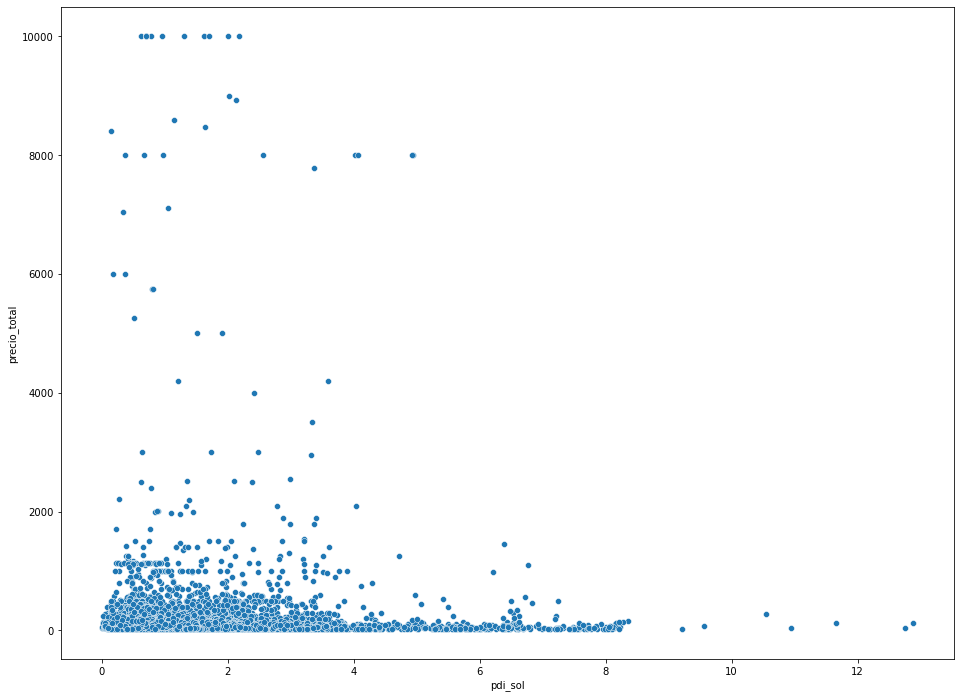

In [281]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

In [282]:
import folium

In [290]:
folium.Map(location=[40.4167278, -3.7033387],zoom_start=15)

In [291]:
datos = df[df.distrito == 'San Blas - Canillejas'].copy()

In [292]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(datos)):
   folium.Marker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
   ).add_to(mapa)

mapa

In [293]:
datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [294]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

In [297]:
metricas = ['precio_total','precio_compra']
dimensiones = ['Beedrooms_disc','accomodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]

minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])

minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')